In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.options.display.max_columns = 80

In [2]:
# load and investigate the data here:
df = pd.read_csv('tennis_stats.csv')
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,7,0.43,2,9,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,0,0.57,1,9,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,8,0.40,1,19,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,6,0.40,0,14,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,0,0.50,2,3,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [3]:
df.drop(['Player', 'Year'], axis=1, inplace=True)

In [4]:
df.describe()

,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.00000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,0.565386,49.112144,198.30796,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,0.119426,56.630264,221.29607,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,0.520000,6.000000,22.00000,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,0.590000,23.000000,86.00000,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,0.630000,80.000000,349.00000,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,1.000000,309.000000,910.00000,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


In [5]:
df.corr().loc['Wins'].sort_values(ascending=False)

Wins                          1.000000
ServiceGamesPlayed            0.929153
ReturnGamesPlayed             0.928408
BreakPointsOpportunities      0.923453
Winnings                      0.913297
BreakPointsFaced              0.883470
Losses                        0.878732
DoubleFaults                  0.847459
Aces                          0.825301
TotalPointsWon                0.459368
TotalServicePointsWon         0.399270
ServiceGamesWon               0.385040
FirstServePointsWon           0.356702
ReturnGamesWon                0.292920
ReturnPointsWon               0.280240
SecondServePointsWon          0.268979
FirstServeReturnPointsWon     0.256029
BreakPointsSaved              0.252053
SecondServeReturnPointsWon    0.193093
BreakPointsConverted          0.076989
FirstServe                    0.064832
Ranking                      -0.287018
Name: Wins, dtype: float64

In [6]:
df.corr().loc['Ranking'].sort_values(ascending=True)

Winnings                     -0.359835
BreakPointsOpportunities     -0.334548
ServiceGamesPlayed           -0.331738
ReturnGamesPlayed            -0.331478
BreakPointsFaced             -0.322082
DoubleFaults                 -0.305866
Losses                       -0.300614
Wins                         -0.287018
Aces                         -0.277811
TotalPointsWon               -0.272007
TotalServicePointsWon        -0.208355
ReturnPointsWon              -0.202597
ServiceGamesWon              -0.198822
ReturnGamesWon               -0.191280
SecondServePointsWon         -0.181013
FirstServeReturnPointsWon    -0.178664
SecondServeReturnPointsWon   -0.159592
FirstServePointsWon          -0.150004
BreakPointsSaved             -0.121220
FirstServe                   -0.068759
BreakPointsConverted         -0.051005
Ranking                       1.000000
Name: Ranking, dtype: float64

In [7]:
df.corr().loc['Winnings'].sort_values(ascending=False)

Winnings                      1.000000
Wins                          0.913297
ServiceGamesPlayed            0.912985
ReturnGamesPlayed             0.912613
BreakPointsOpportunities      0.900444
BreakPointsFaced              0.876036
Losses                        0.869277
DoubleFaults                  0.854685
Aces                          0.798404
TotalPointsWon                0.461061
TotalServicePointsWon         0.407707
ServiceGamesWon               0.395577
FirstServePointsWon           0.361121
SecondServePointsWon          0.281215
ReturnGamesWon                0.279645
ReturnPointsWon               0.271646
BreakPointsSaved              0.258271
FirstServeReturnPointsWon     0.240808
SecondServeReturnPointsWon    0.199401
BreakPointsConverted          0.075022
FirstServe                    0.057882
Ranking                      -0.359835
Name: Winnings, dtype: float64

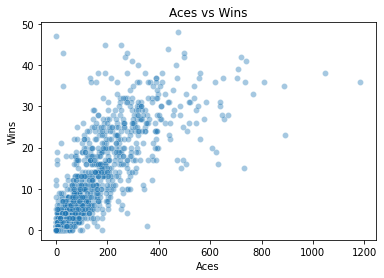

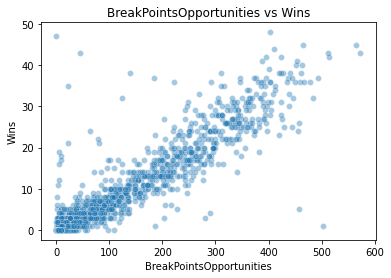

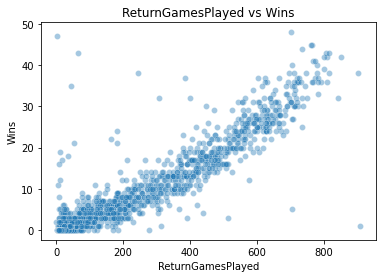

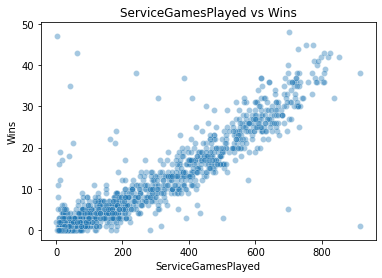

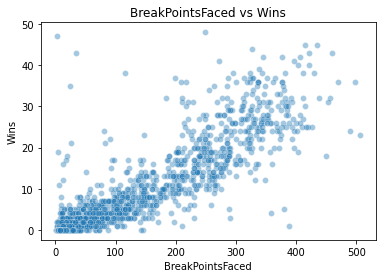

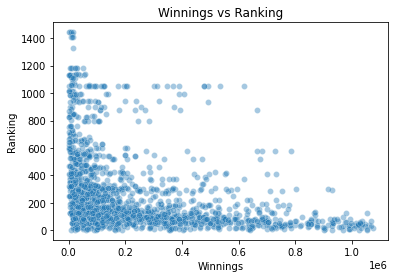

<Figure size 432x288 with 0 Axes>

In [26]:
# perform exploratory analysis
def create_scatter(x, y, data=None):
    sns.scatterplot(data=data, x=x, y=y, alpha=0.4)
    plt.title(f'{x} vs {y}')
    plt.show()
    plt.clf()

create_scatter('Aces', 'Wins', df)    
create_scatter('BreakPointsOpportunities', 'Wins', df)
create_scatter('ReturnGamesPlayed', 'Wins', df)
create_scatter('ServiceGamesPlayed', 'Wins', df)
create_scatter('BreakPointsFaced', 'Wins', df)
create_scatter('Winnings', 'Ranking', df)

In [11]:
## perform single feature linear regressions here:
feature_1 = df.BreakPointsOpportunities.values.reshape(-1, 1)
wins = df.Wins.values.reshape(-1,1)

array([[1],
       [0],
       [4],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [13]:
feature_train, feature_test, wins_train, wins_test = train_test_split(feature_1, wins, train_size=0.8, random_state=1)

model = LinearRegression()
model.fit(feature_train, wins_train)
model.score(feature_test, wins_test)

0.8657873637258577

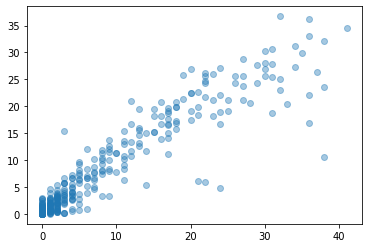

In [47]:
wins_predicted = model.predict(feature_test)
plt.scatter(wins_test, wins_predicted, alpha= 0.4)
plt.show()

In [76]:
def model_features(feature_list, outcome_name, data):
    features = data[feature_list]
    outcome = data[outcome_name]
    
    x_train, x_test, y_train, y_test = train_test_split(features, outcome, test_size = 0.2, random_state = 1)
        
    if len(x_train.shape) < 2:
        x_train = np.array(x_train).reshape(-1,1)
        x_test = np.array(x_test).reshape(-1,1)
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    print(f'Train R^2: {model.score(x_train, y_train)}')
    print(f'Test R^2: {model.score(x_test, y_test)}')
    
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    y_predicted = model.predict(x_test)
    name = str(outcome_name[0])
    plt.scatter(y_test, y_predicted, alpha=0.2)
    plt.title(f"Actual {name} vs predicted {name}")
    plt.xlabel(f"Actual {name}")
    plt.ylabel(f"Predicted {name}")
    plt.show()
    plt.clf()

Train R^2: 0.8589797150658927
Test R^2: 0.8852088411694671
[('ServiceGamesPlayed', array([ 0.1425784 , -0.09981063]))]


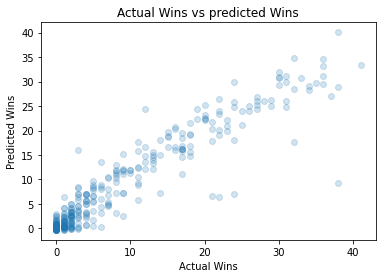

<Figure size 432x288 with 0 Axes>

In [77]:
## perform two feature linear regressions here:
model_features(["ServiceGamesPlayed", "ReturnGamesPlayed"], ["Wins"], df)

In [ ]:
## perform multiple feature linear regressions here:
model_feature([])